Working with images in Python

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy

In [4]:
pip install opencv-python

  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

from glob import glob

from IPython import display as ipd
from tqdm.notebook import tqdm

In [3]:
import subprocess

Converting Video Types - mov to mp4

In [9]:
# Corrected code
input_file = r'C:\\Users\\iutka\\Downloads\\Utkarsh\\python codes\\026c7465-309f6d33.mov'


In [10]:
input_file

'C:\\\\Users\\\\iutka\\\\Downloads\\\\Utkarsh\\\\python codes\\\\026c7465-309f6d33.mov'

In [ ]:
# Provide the full path to the ffmpeg executable if it's not in the PATH
ffmpeg_path = r'C:\FFmpeg\bin\ffmpeg.exe'

# Run the ffmpeg command
subprocess.run([ffmpeg_path, 
                '-i',
                input_file,
                '-qscale',
                '0',
                '026c7465-309f6d33.mp4',
                '-loglevel',
                'quiet']
              )

In [ ]:
!dir -GFlash --color

 Volume in drive C has no label.
 Volume Serial Number is 1488-DAD3

 Directory of c:\Users\iutka\Downloads\Utkarsh\python codes


 Directory of c:\Users\iutka\Downloads\Utkarsh\python codes



File Not Found


Display Video in python

In [4]:
ipd.Video('026c7465-309f6d33.mp4', width=700)

#open the video file and read the metadata

In [5]:
# Load in video capture
cap = cv2.VideoCapture('026c7465-309f6d33.mp4')

In [6]:
# Total number of frames in video
cap.get(cv2.CAP_PROP_FRAME_COUNT)

1202.0

In [7]:
#total number of frames in the video
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
print(f' Height: {height}, Width: {width}')

 Height: 720.0, Width: 1280.0


In [8]:
# Get frames per second
fps = cap.get(cv2.CAP_PROP_FPS)
print(f'FPS : {fps:0.2f}')

FPS : 30.03


In [9]:
cap.release()

Pulling in images from Captured video

In [10]:
cap = cv2.VideoCapture('026c7465-309f6d33.mp4')
ret, img = cap.read()
print(f'Returned {ret} and img of shape {img.shape}')

Returned True and img of shape (720, 1280, 3)


In [11]:
## Helper function for plotting opencv images in notebook
def display_cv2_img(img, figsize=(10, 10)):
    img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img_)
    ax.axis("off")

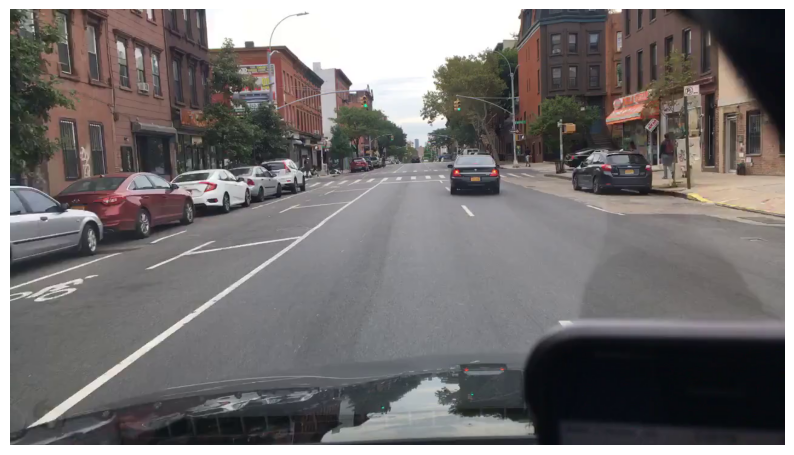

In [12]:
display_cv2_img(img)


In [13]:
cap.release()

In [14]:
#Helper function for plotting opencv images in notebook
def display_cv2_img(img,figsize=(10,10)):
    plt.figure(figsize=figsize)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

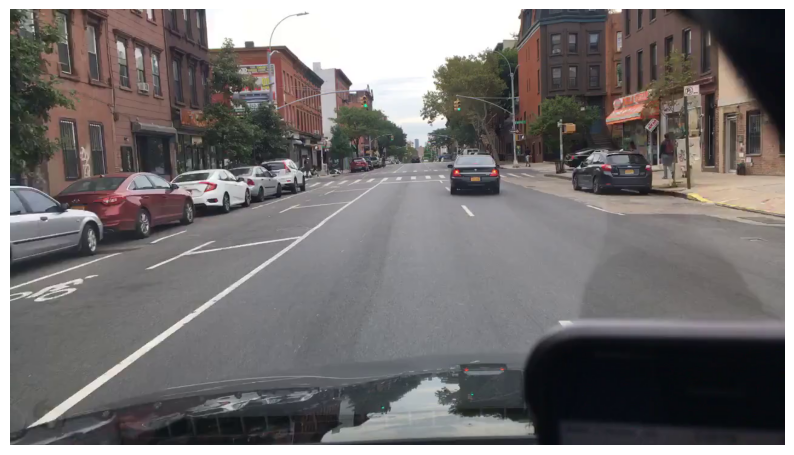

In [15]:
display_cv2_img(img)

In [16]:
cap.release()

Display multiple frames from the Video

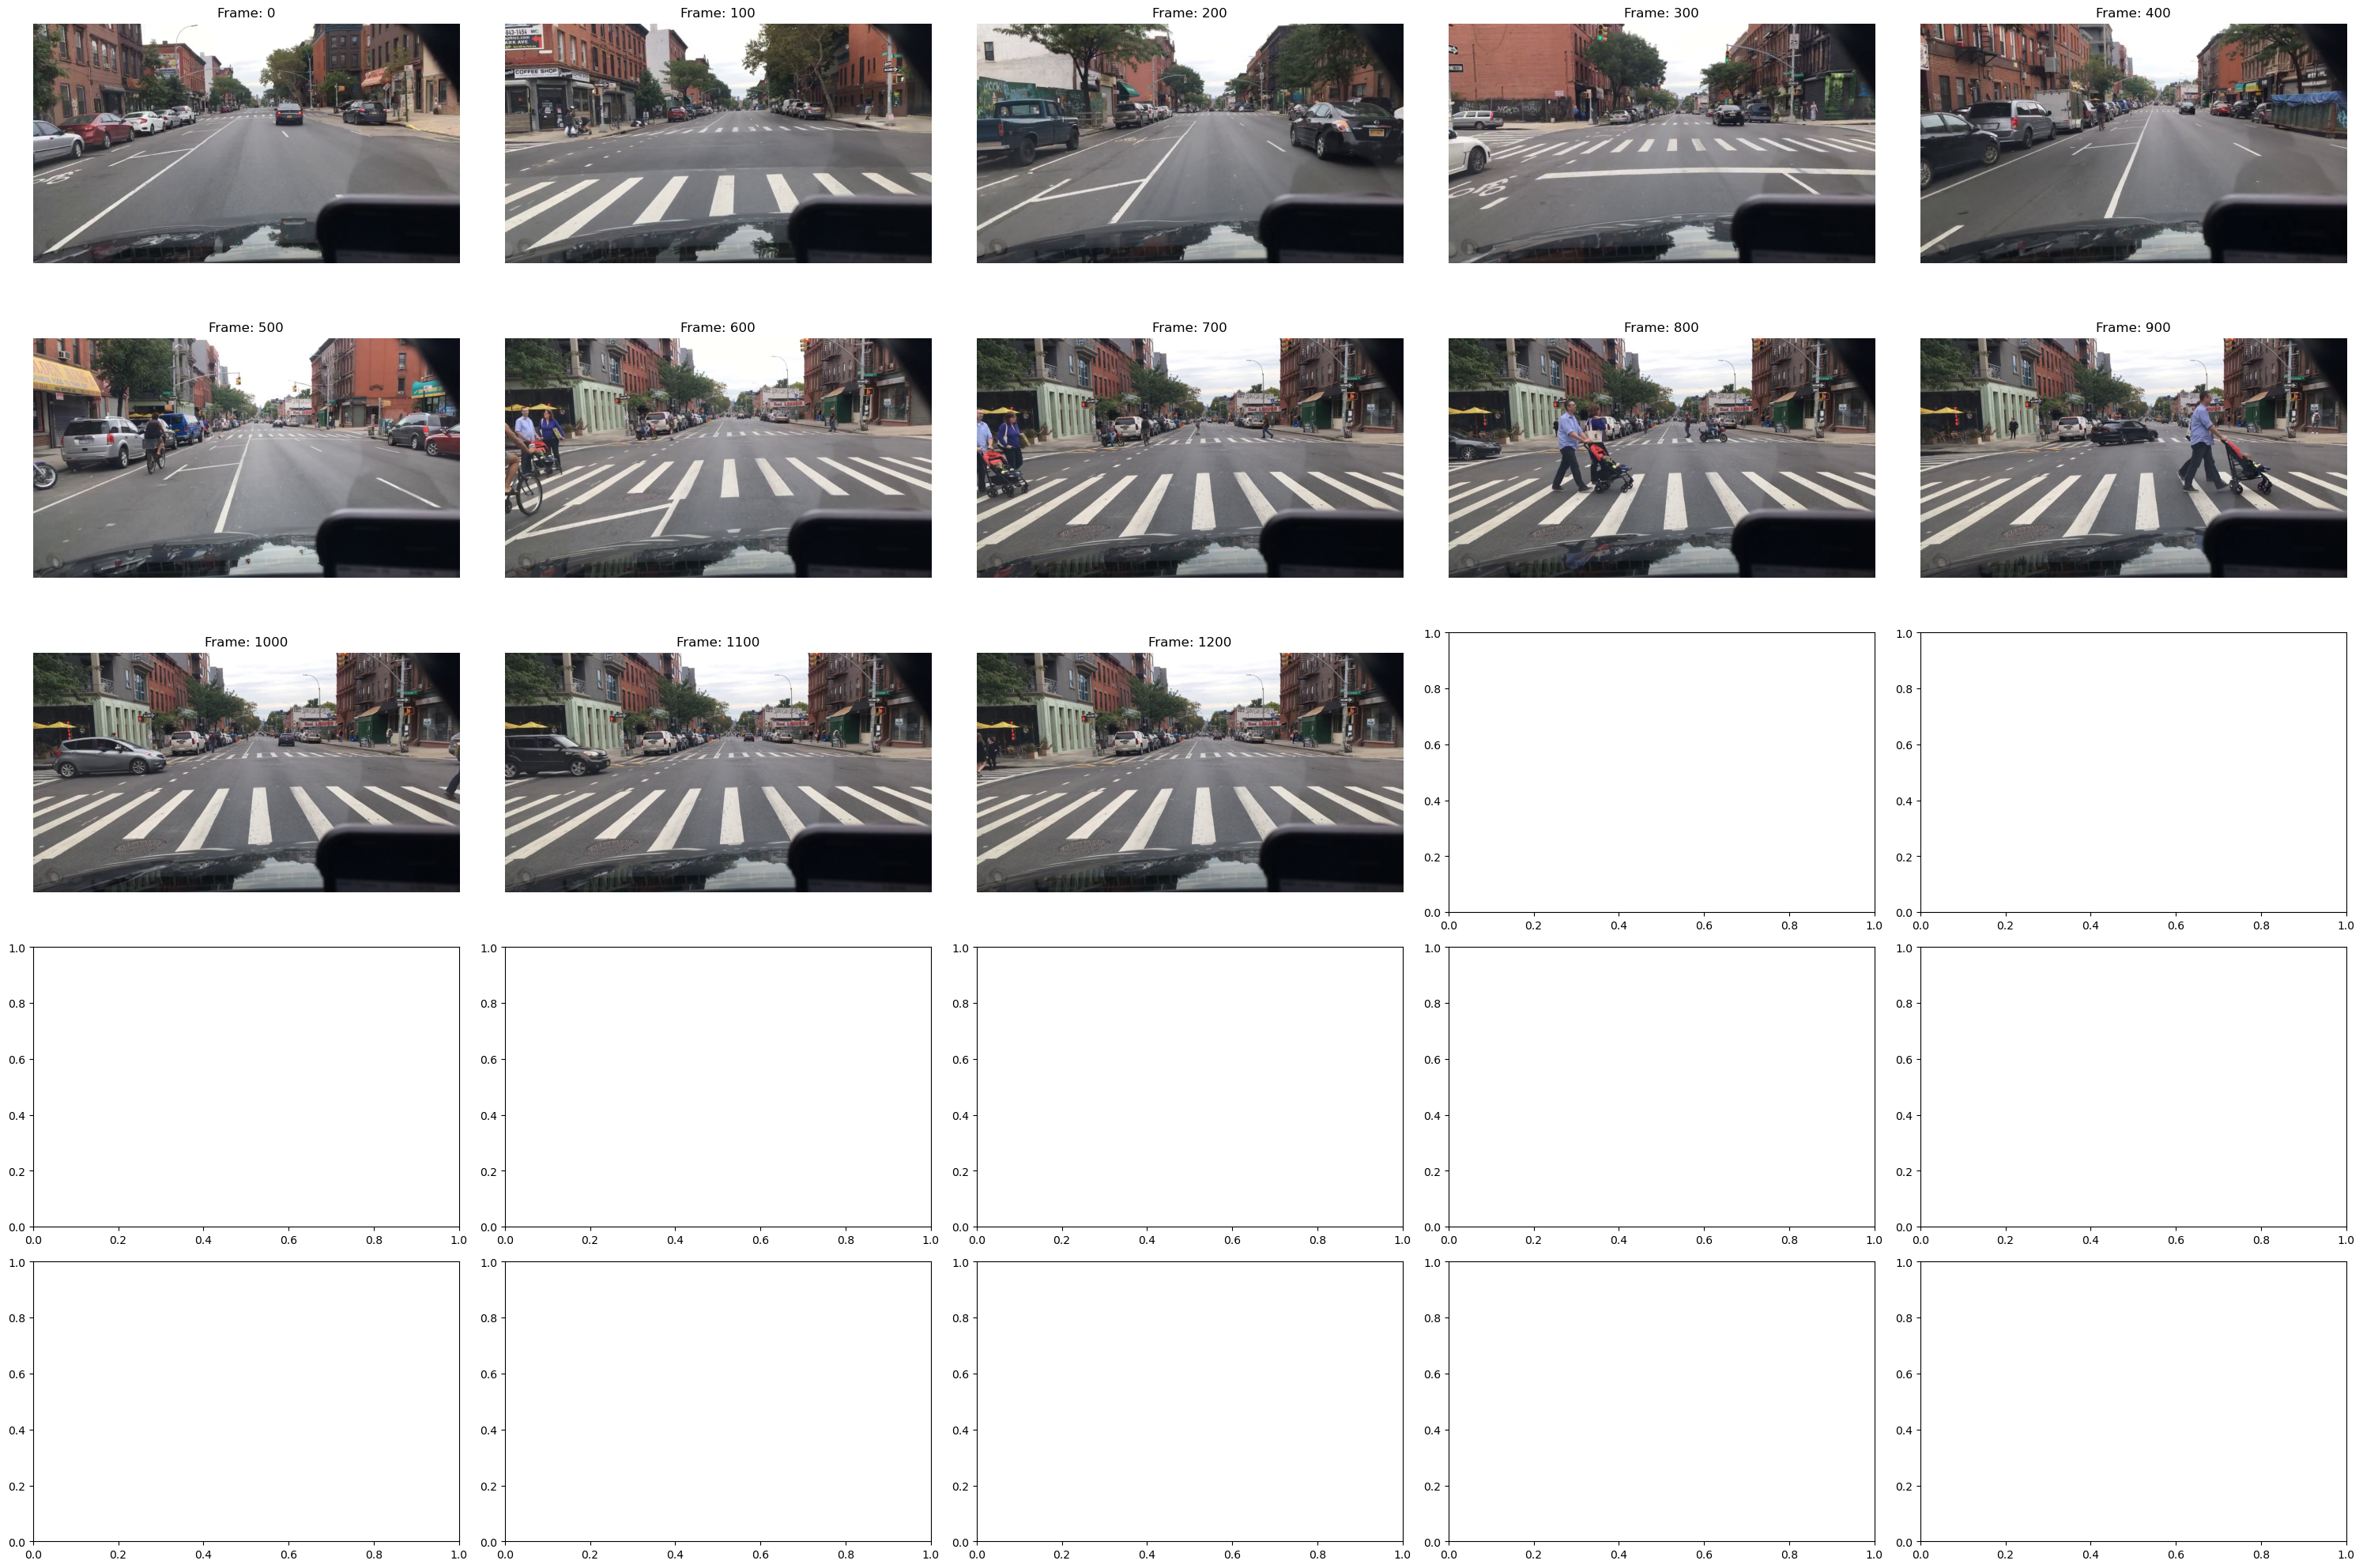

In [17]:
fig, axs = plt.subplots(5, 5, figsize=(30, 20))
axs = axs.flatten()

cap = cv2.VideoCapture("026c7465-309f6d33.mp4")
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

img_idx = 0
for frame in range(n_frames):
    ret, img = cap.read()
    if ret == False:
        break
    if frame % 100 == 0:
        axs[img_idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[img_idx].set_title(f'Frame: {frame}')
        axs[img_idx].axis('off')
        img_idx += 1

plt.tight_layout()
plt.show()
cap.release()

Add annotations to the Video Images

In [24]:
labels = pd.read_csv('mot_labels.csv',
                     low_memory=False)
video_labels = (
    labels.query('videoName == "026c7465-309f6d33"').reset_index(drop=True).copy()
)
video_labels["video_frame"] = (video_labels["frameIndex"] * 5.95).round().astype("int")


In [ ]:
video_labels["video_frame"]

0          0
1          0
2          0
3          0
4          0
        ... 
5166    1196
5167    1196
5168    1196
5169    1196
5170    1196
Name: video_frame, Length: 5171, dtype: int32

In [34]:
video_labels

name          videoName  frameIndex        id  \
0     026c7465-309f6d33-0000001.jpg  026c7465-309f6d33           0  107627.0   
1     026c7465-309f6d33-0000001.jpg  026c7465-309f6d33           0  107628.0   
2     026c7465-309f6d33-0000001.jpg  026c7465-309f6d33           0  107629.0   
3     026c7465-309f6d33-0000001.jpg  026c7465-309f6d33           0  107630.0   
4     026c7465-309f6d33-0000001.jpg  026c7465-309f6d33           0  107631.0   
...                             ...                ...         ...       ...   
5166  026c7465-309f6d33-0000202.jpg  026c7465-309f6d33         201  107719.0   
5167  026c7465-309f6d33-0000202.jpg  026c7465-309f6d33         201  107646.0   
5168  026c7465-309f6d33-0000202.jpg  026c7465-309f6d33         201  107726.0   
5169  026c7465-309f6d33-0000202.jpg  026c7465-309f6d33         201  107714.0   
5170  026c7465-309f6d33-0000202.jpg  026c7465-309f6d33         201  107729.0   

     category attributes.crowd attributes.occluded attributes.truncated  \
0         car            False               False                 True   
1         car            False                True                False   
2         car            False                True                False   
3         car            False                True                False   
4         car            False                True                False   
...       ...              ...                 ...                  ...   
5166      car            False                True                False   
5167      car             True                True                False   
5168      bus            False                True                False   
5169  bicycle            False               False                False   
5170      car            False                True                False   

        box2d.x1    box2d.x2    box2d.y1    box2d.y2  haveVideo  video_frame  
0       0.000000  153.988439  291.329480  423.319571       True            0  
1      68.373245  306.193229  269.925681  380.511974       True            0  
2     264.574732  398.943022  262.791082  337.704377       True            0  
3     359.036452  450.074319  258.390115  317.489678       True            0  
4     411.295127  488.715386  246.777076  305.598679       True            0  
...          ...         ...         ...         ...        ...          ...  
5166  613.232969  631.297696  246.777076  260.648206       True         1196  
5167  619.309909  670.255711  233.713868  261.097237       True         1196  
5168  709.738708  738.395722  234.987513  249.634431       True         1196  
5169  878.977001  892.857026  246.356507  273.515276       True         1196  
5170  786.794234  807.809377  244.539851  270.012752       True         1196  

[5171 rows x 14 columns]

In [26]:
video_labels['frameIndex'].min()

0

In [27]:
video_labels['frameIndex'].max()

201

In [59]:
video_labels.iloc[2000]

name                    026c7465-309f6d33-0000085.jpg
videoName                           026c7465-309f6d33
frameIndex                                         84
id                                           107719.0
category                                          car
attributes.crowd                                False
attributes.occluded                              True
attributes.truncated                            False
box2d.x1                                   620.652411
box2d.x2                                    632.26545
box2d.y1                                   246.777076
box2d.y2                                   257.744946
haveVideo                                        True
video_frame                                       500
Name: 2000, dtype: object

In [28]:
video_labels["category"].value_counts()

category
car              3030
pedestrian        847
bicycle           381
rider             320
truck             194
other vehicle     115
bus               109
other person       74
motorcycle         67
trailer            34
Name: count, dtype: int64

In [41]:
# Pull frame 1035

cap = cv2.VideoCapture("026c7465-309f6d33.mp4")
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

img_idx = 0
for frame in range(n_frames):
    ret, img = cap.read()
    if ret == False:
        break
    if frame == 5:
        break
cap.release()

In [60]:
# Pull frame 1035

cap = cv2.VideoCapture("026c7465-309f6d33.mp4")
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

img_idx = 0
for frame in range(video_labels['video_frame'].max()):
    ret, img = cap.read()
    if ret == False:
        break
    if frame == 500:
        break
cap.release()

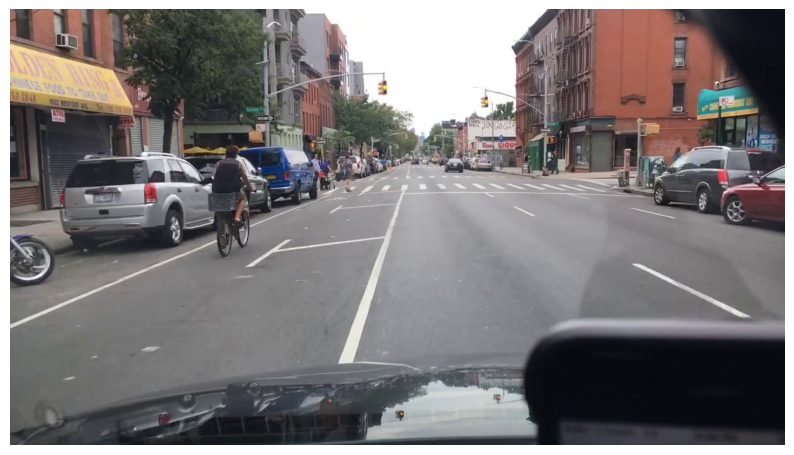

In [61]:
display_cv2_img(img)

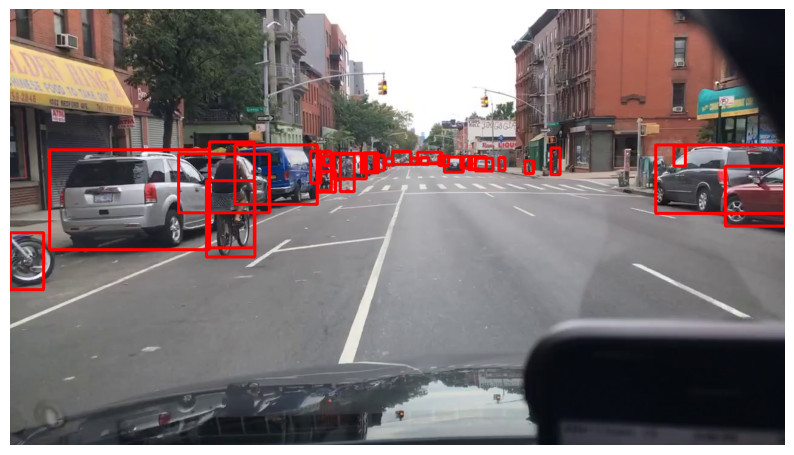

In [62]:
img_example = img.copy()
frame_labels = video_labels.query('video_frame == 500')
for i, d in frame_labels.iterrows():
    pt1 = int(d['box2d.x1']), int(d['box2d.y1'])
    pt2 = int(d['box2d.x2']), int(d['box2d.y2'])
    cv2.rectangle(img_example, pt1, pt2, (0, 0, 255), 3)

display_cv2_img(img_example)

In [64]:
video_labels['category'].unique()

array(['car', 'truck', 'pedestrian', 'other vehicle', 'rider', 'bicycle',
       'other person', 'trailer', 'motorcycle', 'bus'], dtype=object)

Displaying Colored by Category

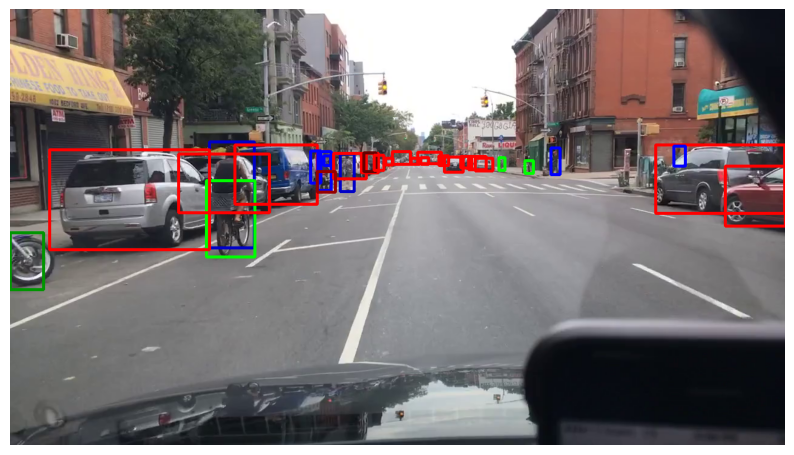

In [67]:
color_map = {
    "car": (0, 0, 255),
    "truck": (0, 0, 100),
    "pedestrian": (255, 0, 0),
    "other vehicle": (0, 0, 150),
    "rider": (200, 0, 0),
    "bicycle": (0, 255, 0),
    "other person": (200, 0, 0),
    "trailer": (0, 150, 150),
    "motorcycle": (0, 150, 0),
    "bus": (0, 0, 100),
}

img_example = img.copy()
frame_labels = video_labels.query('video_frame == 500')
for i, d in frame_labels.iterrows():
    pt1 = int(d['box2d.x1']), int(d['box2d.y1'])
    pt2 = int(d['box2d.x2']), int(d['box2d.y2'])
    color = color_map[d['category']]
    cv2.rectangle(img_example, pt1, pt2, color, 3)

display_cv2_img(img_example)

Adding Text

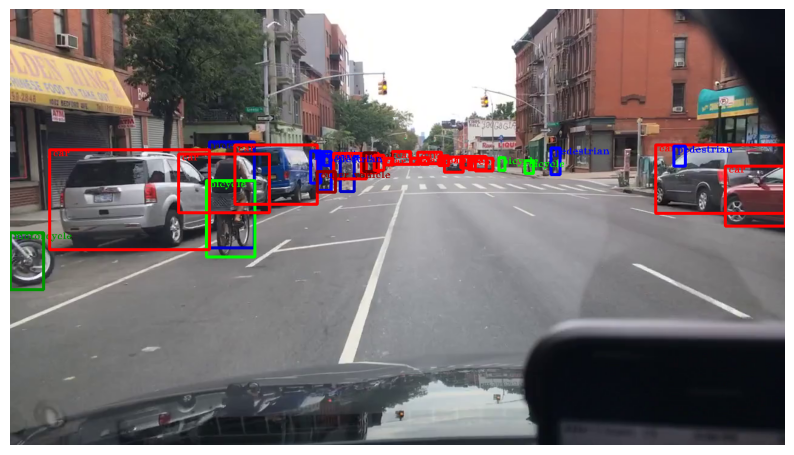

In [68]:
frame_labels = video_labels.query("video_frame == @frame")
font = cv2.FONT_HERSHEY_TRIPLEX
img_example = img.copy()
for i, d in frame_labels.iterrows():
    pt1 = int(d["box2d.x1"]), int(d["box2d.y1"])
    pt2 = int(d["box2d.x2"]), int(d["box2d.y2"])
    color = color_map[d["category"]]
    img_example = cv2.rectangle(img_example, pt1, pt2, color, 3)
    pt_text = int(d["box2d.x1"]) + 5, int(d["box2d.y1"] + 10)
    img_example = cv2.putText(img_example, d["category"], pt_text, font, 0.5, color)
display_cv2_img(img_example)
cap.release()

#Label and output Annotated Video

In [69]:
def add_annotations(img, frame, video_labels):
    max_frame = video_labels.query("video_frame <= @frame")["video_frame"].max()
    frame_labels = video_labels.query("video_frame == @max_frame")
    for i, d in frame_labels.iterrows():
        pt1 = int(d["box2d.x1"]), int(d["box2d.y1"])
        pt2 = int(d["box2d.x2"]), int(d["box2d.y2"])
        color = color_map[d["category"]]
        img = cv2.rectangle(img, pt1, pt2, color, 3)
    return img

In [70]:
!rm -r out_test.mp4

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [72]:
VIDEO_CODEC = "mp4v"
fps = 30.03
width = 1280
height = 720
out = cv2.VideoWriter("out_test.mp4",
                cv2.VideoWriter_fourcc(*VIDEO_CODEC),
                fps,
                (width, height))

cap = cv2.VideoCapture("026c7465-309f6d33.mp4")
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

for frame in tqdm(range(n_frames), total=n_frames):
    ret, img = cap.read()
    if ret == False:
        break
    img = add_annotations(img, frame, video_labels)
    out.write(img)
out.release()
cap.release()

  0%|          | 0/1202 [00:00<?, ?it/s]

In [73]:
tmp_output_path = "out_test.mp4"
output_path = "out_test_compressed.mp4"
subprocess.run(
    [
        "ffmpeg",
        "-i",
        tmp_output_path,
        "-crf",
        "18",
        "-preset",
        "veryfast",
        "-vcodec",
        "libx264",
        output_path,
        '-loglevel',
        'quiet'
    ]
)

CompletedProcess(args=['ffmpeg', '-i', 'out_test.mp4', '-crf', '18', '-preset', 'veryfast', '-vcodec', 'libx264', 'out_test_compressed.mp4', '-loglevel', 'quiet'], returncode=0)

In [74]:
ipd.Video('out_test_compressed.mp4', width=600)

Cartoon World Begins

In [76]:
pip install tensorflow

   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 1.8/376.0 MB 12.6 MB/s eta 0:00:30
   ---------------------------------------- 4.5/376.0 MB 11.7 MB/s eta 0:00:32
    --------------------------------------- 5.5/376.0 MB 10.2 MB/s eta 0:00:37
    --------------------------------------- 6.3/376.0 MB 7.7 MB/s eta 0:00:48
   - -------------------------------------- 9.4/376.0 MB 9.2 MB/s eta 0:00:40
   - -------------------------------------- 10.7/376.0 MB 9.5 MB/s eta 0:00:39
   - -------------------------------------- 11.8/376.0 MB 8.2 MB/s eta 0:00:45
   - -------------------------------------- 12.1/376.0 MB 8.1 MB/s eta 0:00:45
   - -------------------------------------- 13.6/376.0 MB 7.3 MB/s eta 0:00:50
   - -------------------------------------- 14.4/376.0 MB 6.9 MB/s eta 0:00:53
   - -------------------------------------- 16.3/376.0 MB 7.0 MB/s eta 0:00:52
   - -------------------------------------- 18.1/376.0 MB 7.2 

In [1]:
pip install network

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install guided_filter

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement guided_filter (from versions: none)
ERROR: No matching distribution found for guided_filter


Video Processing

In [4]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

from glob import glob

import IPython.display as ipd
from tqdm import tqdm

import subprocess

plt.style.use('ggplot')

In [5]:
ipd.Video('026c7465-309f6d33.mp4', width=500)

In [6]:
# Load in video capture
cap = cv2.VideoCapture('026c7465-309f6d33.mp4')

In [7]:
# Total number of frames in video
cap.get(cv2.CAP_PROP_FRAME_COUNT)


1202.0

In [8]:
# Video height and width
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
print(f'Height {height}, Width {width}')

Height 720.0, Width 1280.0


In [9]:
# Get frames per second
fps = cap.get(cv2.CAP_PROP_FPS)
print(f'FPS : {fps:0.2f}')


FPS : 30.03


In [10]:

cap.release()

In [11]:
## Helper function for plotting opencv images in notebook
def display_cv2_img(img, figsize=(10, 10)):
    img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img_)
    ax.axis("off")
    return img_

In [12]:
cap.release()

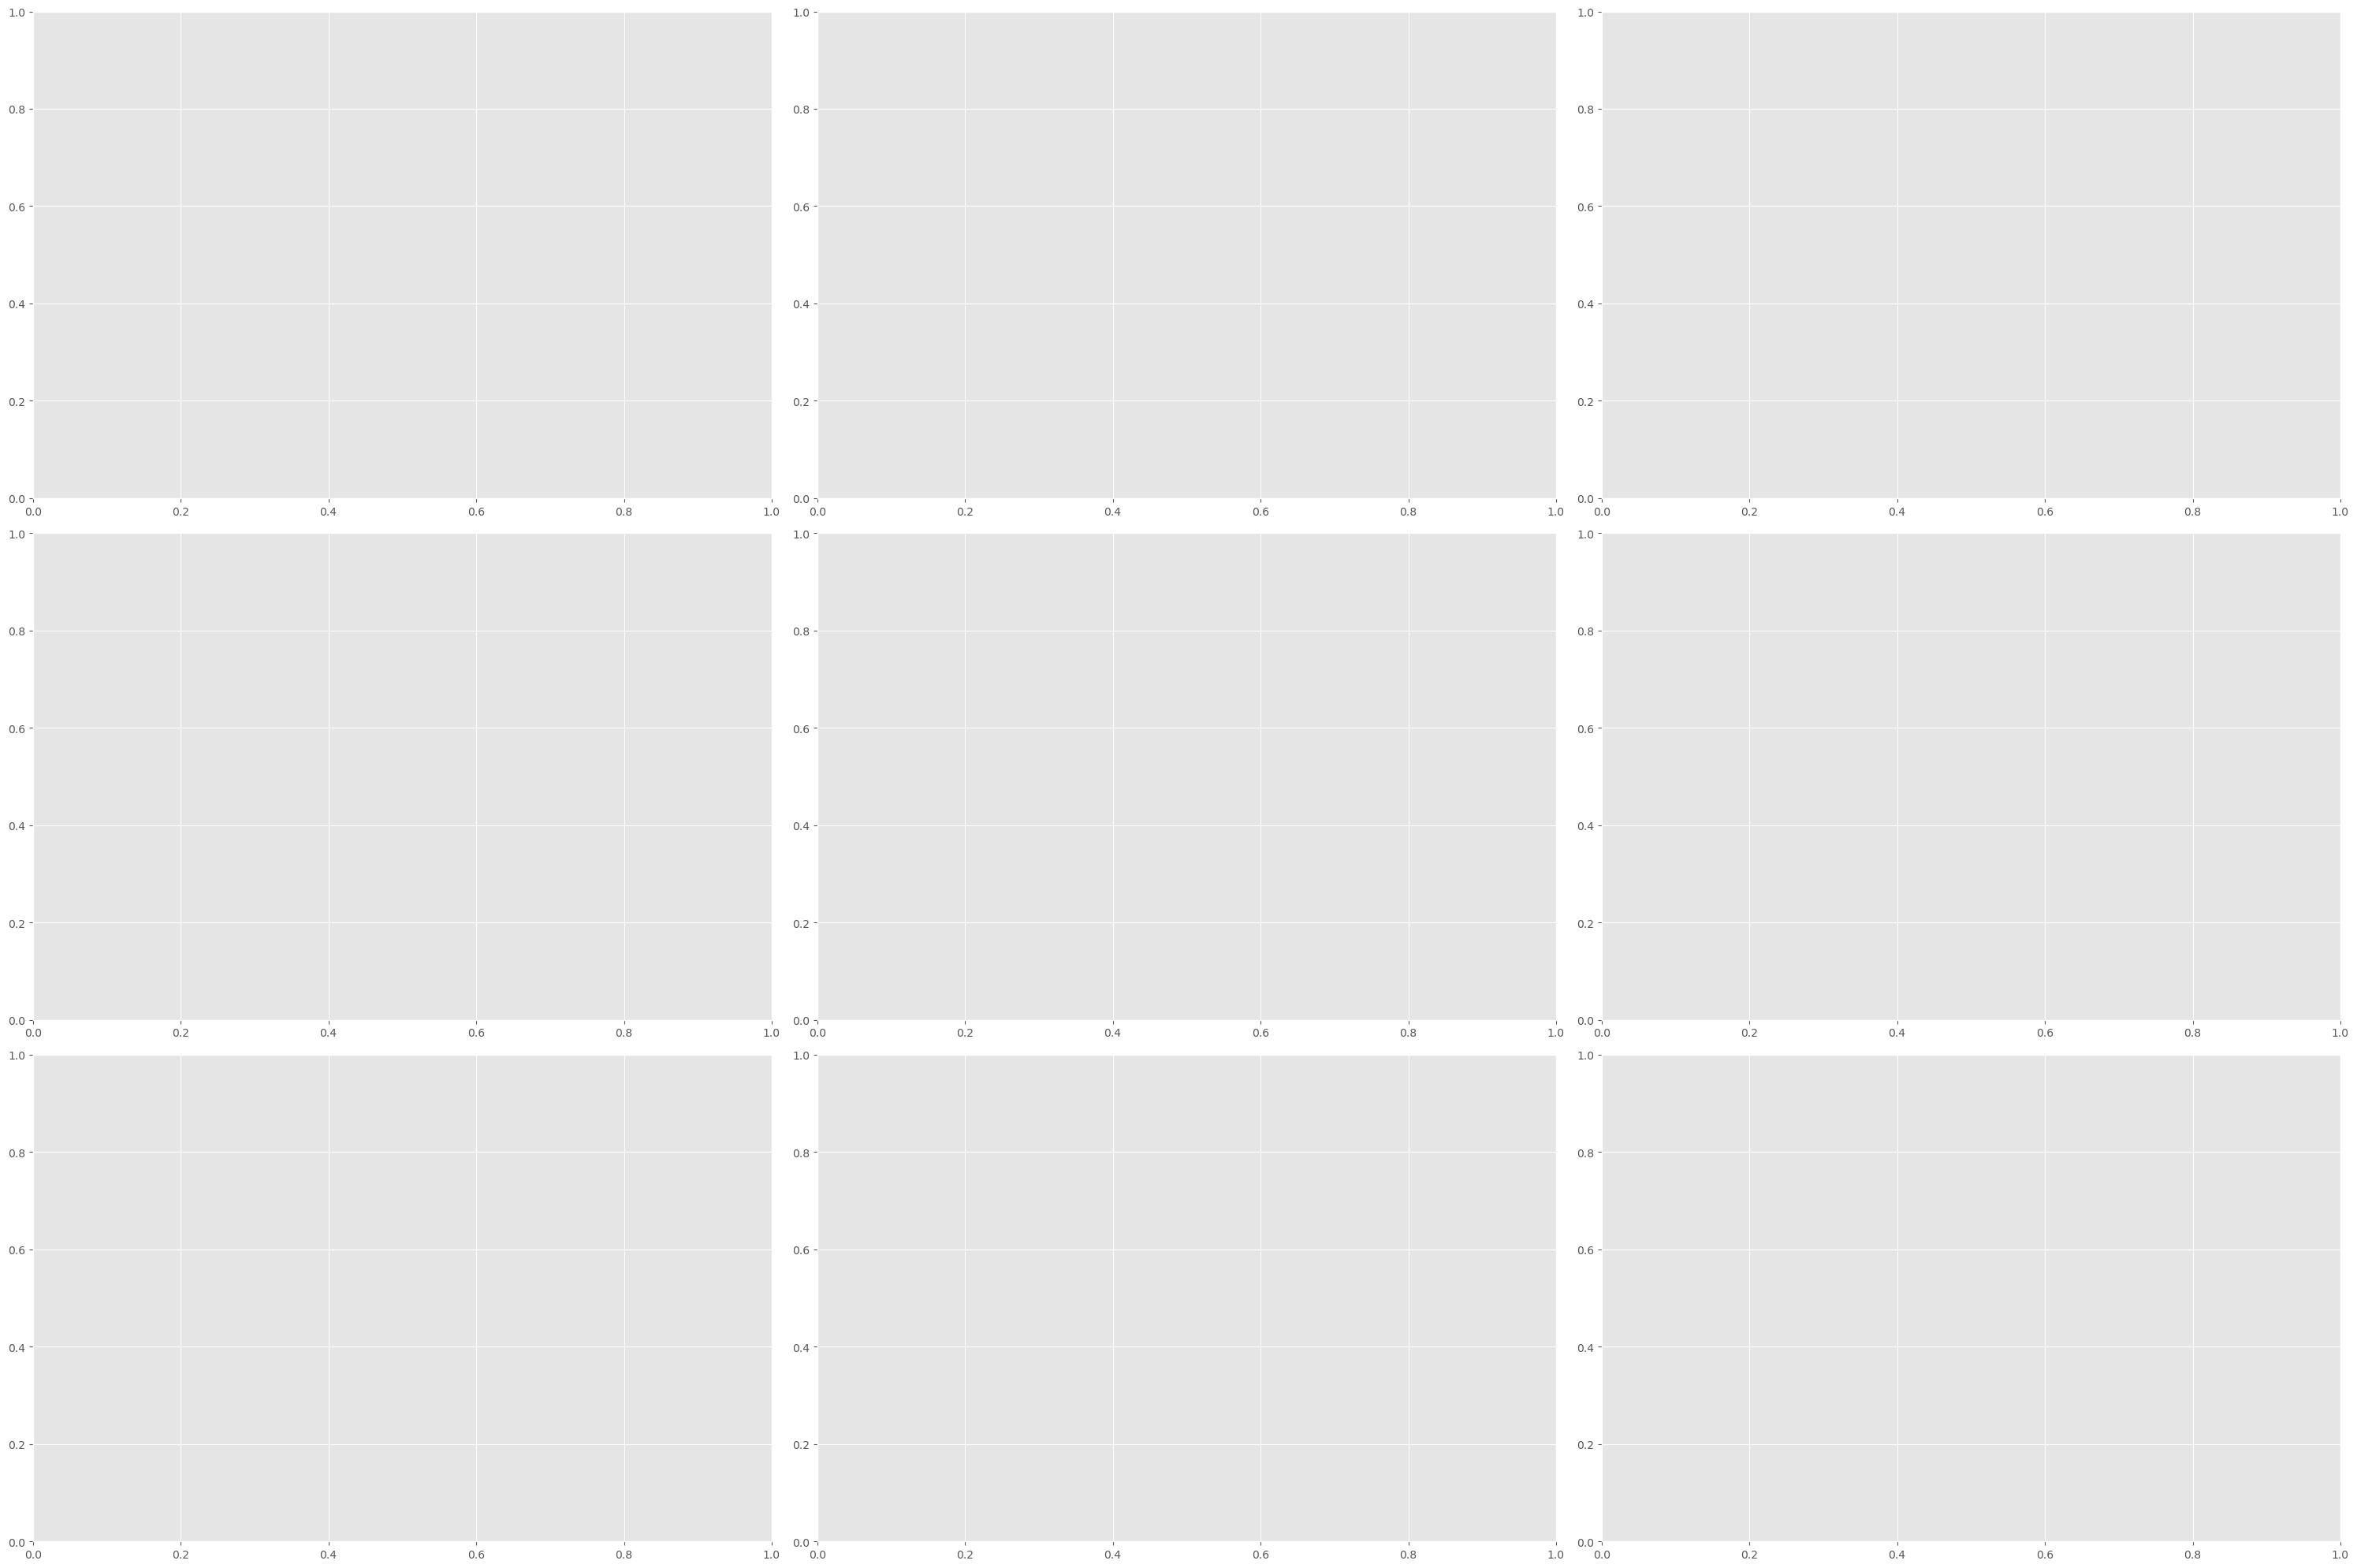

In [13]:
cap = cv2.VideoCapture("videoName.mp4")
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

fig, axs = plt.subplots(3, 3, figsize=(30, 20))
axs = axs.flatten()

img_idx = 0
for frame in range(n_frames):
    ret, img = cap.read()
    if ret == False:
        break
    if frame % 100 == 0:
        axs[img_idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[img_idx].set_title(f'Frame: {frame}')
        axs[img_idx].axis('off')
        img_idx += 1

plt.tight_layout()
plt.show()
cap.release()

In [14]:
sess,final_out,input_photo=new_cartonize(save_folder, model_path)

NameError: name 'new_cartonize' is not defined